In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [2]:
import numpy as np

import tensorflow as tf
import scipy
from tensorflow.keras import layers,Sequential

In [3]:
abnormal_train = os.path.join("D:/Project/Diabetic_Retinopathy/train/TRAIN/Abnormal")
normal_train = os.path.join("D:/Project/Diabetic_Retinopathy/train/TRAIN/No_DR")

abnormal_test = os.path.join("D:/Project/Diabetic_Retinopathy/test/TEST/Abnormal")
normal_test = os.path.join("D:/Project/Diabetic_Retinopathy/test/TEST/No_DR")

In [4]:
train_abnormal_names = os.listdir(abnormal_train)

train_normal_names = os.listdir(normal_train)

test_abnormal_names = os.listdir(abnormal_test)

test_normal_names = os.listdir(normal_test)

In [5]:
print('total training Abnormal images:', len(train_abnormal_names))
print('total training Normal images:', len(train_normal_names))
print('total testing Abnormal images:', len(test_abnormal_names))
print('total testing Normal images:', len(test_normal_names))

total training Abnormal images: 4835
total training Normal images: 3466
total testing Abnormal images: 1010
total testing Normal images: 1042


In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 2
ncols = 5

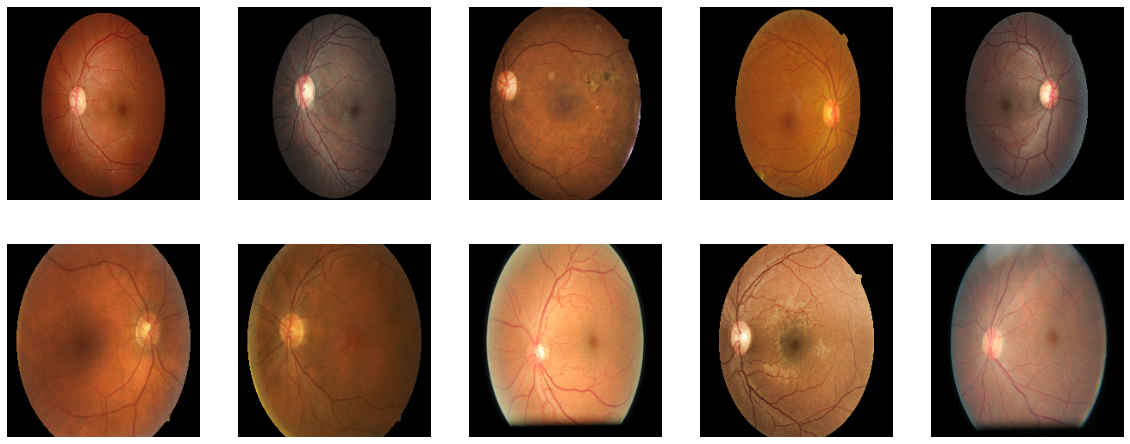

In [7]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

train_abnormal =  [os.path.join(abnormal_train, fname) for fname in np.random.choice(train_abnormal_names, 4, replace=False)]
train_normal =  [os.path.join(normal_train, fname) for fname in np.random.choice(train_normal_names, 4, replace=False)]
test_abnormal = [os.path.join(abnormal_test, str(np.random.choice(test_abnormal_names)))]
test_normal = [os.path.join(normal_test, str(np.random.choice(test_normal_names)))]

for i, img_path in enumerate(train_abnormal + test_abnormal + train_normal + test_normal):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        'D:/Project/Diabetic_Retinopathy/train/TRAIN/',  # This is the source directory for training images
        target_size=(800, 800),  # All images will be resized to 800x800
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')


# Flow training images in batches of 128 using train_datagen generator
test_generator = train_datagen.flow_from_directory(
        'D:/Project/Diabetic_Retinopathy/test/TEST',  # This is the source directory for training images
        target_size=(800, 800),  # All images will be resized to 800x800
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 8301 images belonging to 2 classes.
Found 2052 images belonging to 2 classes.


In [10]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 800x800 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(800, 800, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('abnormal') and 1 for the other ('normal')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 798, 798, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 399, 399, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 397, 397, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 198, 198, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 196, 196, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 98, 98, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 96, 96, 128)       7

In [12]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.1),
              metrics=['accuracy'])

In [13]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=3,  
      epochs=10,
      verbose=1)

C:\Users\DT\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
3/3 [==============================] - 400s 133s/step - loss: 48493643169792.1719 - accuracy: 0.3896
Epoch 2/10
3/3 [==============================] - 313s 104s/step - loss: 54131016.0000 - accuracy: 0.5413
Epoch 3/10
3/3 [==============================] - 321s 103s/step - loss: 2.3411 - accuracy: 0.4925
Epoch 4/10
3/3 [==============================] - 306s 102s/step - loss: 0.6827 - accuracy: 0.5980
Epoch 5/10
3/3 [==============================] - 314s 107s/step - loss: 0.6910 - accuracy: 0.5407
Epoch 6/10
3/3 [==============================] - 312s 100s/step - loss: 0.6696 - accuracy: 0.6240
Epoch 7/10
3/3 [==============================] - 312s 102s/step - loss: 0.6844 - accuracy: 0.5885
Epoch 8/10
3/3 [==============================] - 303s 100s/step - loss: 0.6746 - accuracy: 0.5999
Epoch 9/10
3/3 [==============================] - 321s 109s/step - loss: 0.6776 - accuracy: 0.6159
Epoch 10/10
3/3 [==============================] - 314s 103s/step - loss: 0.6863 - accura

In [14]:
pred = model.predict_generator(test_generator)

C:\Users\DT\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [15]:
pred.astype(int)

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [16]:
test_generator.classes

array([0, 0, 0, ..., 1, 1, 1])

In [17]:
history.history

{'loss': [55421305880576.0,
  33311402.0,
  1.7967513799667358,
  0.6806305050849915,
  0.6901209950447083,
  0.6688179969787598,
  0.6766064167022705,
  0.6823627352714539,
  0.673820972442627,
  0.6842193007469177],
 'accuracy': [0.421875,
  0.5260416865348816,
  0.4713541567325592,
  0.5963541865348816,
  0.5442708134651184,
  0.625,
  0.6067708134651184,
  0.5807291865348816,
  0.6145833134651184,
  0.578125]}

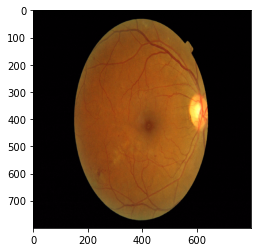

(1, 800, 800, 3)


In [18]:
# A random image from different dataset is providing to check whether my model is predicting correctly
from keras.preprocessing import image
img_path = 'D:/Project/TEST/ABNORMAL/20051019_38557_0100_PP.tif'
img = image.load_img(img_path, target_size=(800, 800))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
plt.imshow(img_tensor[0])
plt.show()
print(img_tensor.shape)

In [19]:
# predicting images
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict_classes(images, batch_size=10)
print("Predicted class is:",classes)

C:\Users\DT\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Predicted class is: [[0]]


We can see the Image provided was from Abnormal that is our 0 class and the model has predicted it correctly. This Image was taken from a different dataset

In [35]:
from keras import models
layer_outputs = [layer.output for layer in model.layers[:6]] 
# Extracts the outputs of the top 6 layers
activation_model = models.Model(inputs=model.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input

In [36]:
activations = activation_model.predict(img_tensor) 
# Returns a list of five Numpy arrays: one array per layer activation

In [37]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 798, 798, 16)


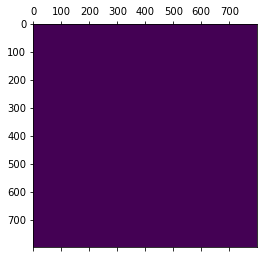

In [38]:
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

<ipython-input-39-1eea63830fd9>:18: RuntimeWarning: invalid value encountered in true_divide
  channel_image /= channel_image.std()


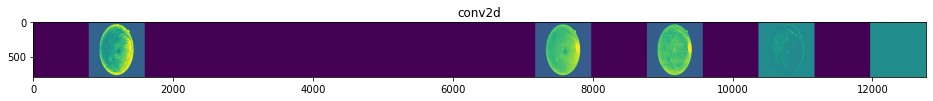

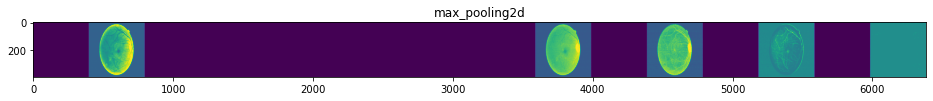

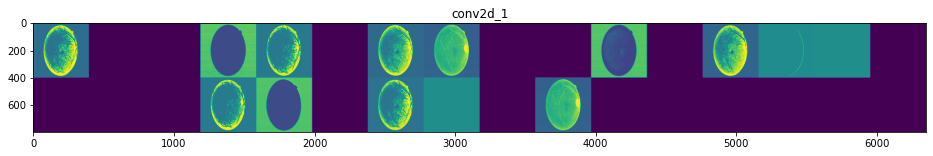

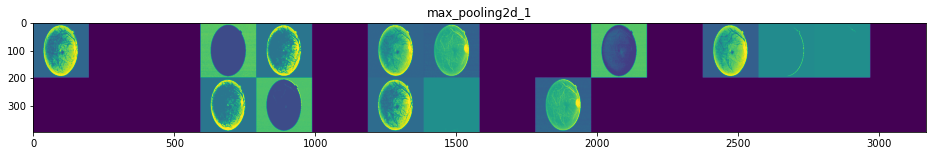

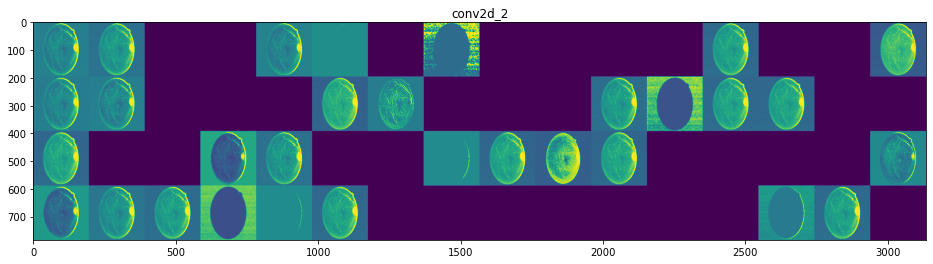

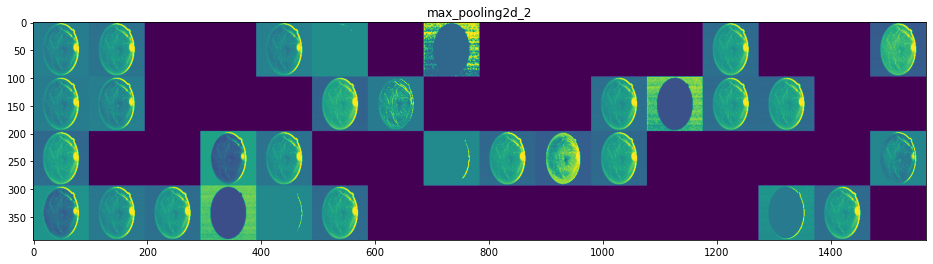

In [39]:
layer_names = []
for layer in model.layers[:12]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')